Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

Loading the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\bikas\OneDrive\Desktop\Infy Capstone Project\Datasets\adult_data.csv")
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.columns = columns_name
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Handle Missing Values

In [7]:
df.replace(' ?', np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
df = df.dropna()
df.shape

(30161, 15)

Removing Outliers

In [9]:
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [10]:
df.shape

(19064, 15)

Importance of Weekly Working Hours

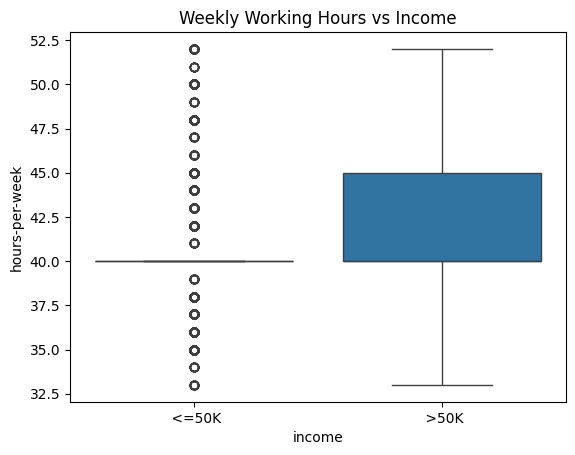

income
<=50K    41.137606
>50K     42.827904
Name: hours-per-week, dtype: float64

In [11]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Weekly Working Hours vs Income")
plt.show()
df.groupby('income')['hours-per-week'].mean()

Correlation with Earning Potential

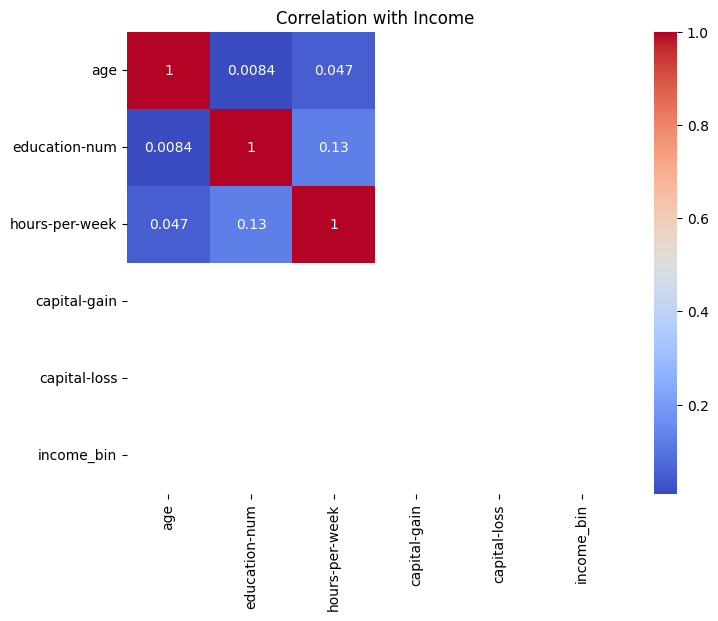

In [12]:
df['income_bin'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
corr = df[numerical_cols + ['income_bin']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Income")
plt.show()

Education Years vs Earning Potential

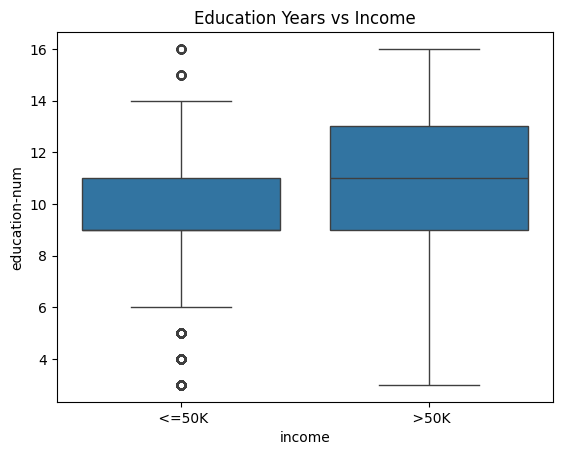

income
<=50K     9.703450
>50K     11.413579
Name: education-num, dtype: float64

In [13]:
sns.boxplot(x='income', y='education-num', data=df)
plt.title("Education Years vs Income")
plt.show()
df.groupby('income')['education-num'].mean()

Age vs Earning Potential

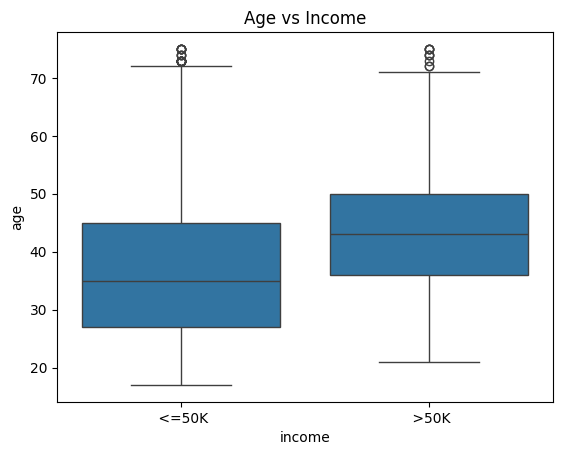

income
<=50K    36.680582
>50K     43.509575
Name: age, dtype: float64

In [14]:
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()
df.groupby('income')['age'].mean()

Feature Engineering(Categorical → Numerical)

In [15]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bin
1,38,2,215646,10,9,0,5,1,4,1,0,0,40,37,0,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,37,0,0
3,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0,0
4,37,2,284582,11,14,2,3,5,4,0,0,0,40,37,0,0
6,52,4,209642,10,9,2,3,0,4,1,0,0,45,37,1,0


Building a predictive model for the earning potential

In [16]:
df['income'].value_counts()

income
0    15043
1     4021
Name: count, dtype: int64

In [17]:
df.shape

(19064, 16)

In [18]:
df.drop(columns=['income_bin'], inplace=True)

In [19]:
df.shape

(19064, 15)

In [20]:
X = df.drop(columns=['income'])
y = df['income']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.7288224495148178
Precision: 0.4224021592442645
Recall   : 0.7786069651741293
F1 Score : 0.5476815398075241


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      3009
           1       0.42      0.78      0.55       804

    accuracy                           0.73      3813
   macro avg       0.67      0.75      0.68      3813
weighted avg       0.82      0.73      0.75      3813



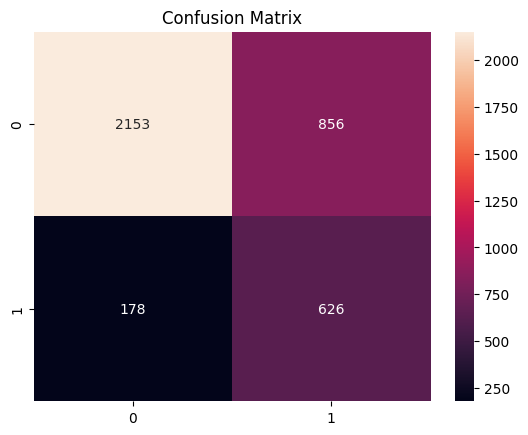

In [26]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3009
           1       0.64      0.51      0.57       804

    accuracy                           0.84      3813
   macro avg       0.76      0.72      0.73      3813
weighted avg       0.83      0.84      0.83      3813



              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3009
           1       0.64      0.51      0.57       804

    accuracy                           0.84      3813
   macro avg       0.76      0.72      0.73      3813
weighted avg       0.83      0.84      0.83      3813



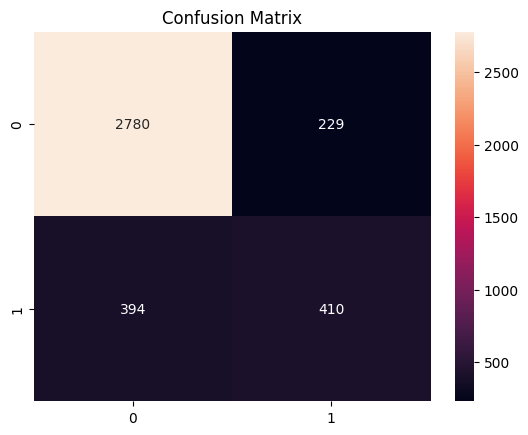

In [28]:
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Key Business Insights:

Education level and weekly working hours significantly impact earning potential.

Individuals with higher education years have a greater likelihood of earning >50K.

Working more hours per week correlates positively with higher income.

Middle-aged individuals tend to earn more compared to very young or very old groups.

The predictive model can help organizations:

Identify high-income demographic segments

Optimize compensation strategies

Make data-driven workforce planning decisions